In [1]:
import numpy as np
import os
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
train_folders_directory = 'drive/MyDrive/Colab Notebooks/Eyelid_Closure_Images/TRAIN/'
test_folders_directory = 'drive/MyDrive/Colab Notebooks/Eyelid_Closure_Images/TEST'
import os
print(os.listdir(test_folders_directory))

['TEST']


In [7]:
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1 / 255.0)

train_generator = train_datagen.flow_from_directory(
    directory=train_folders_directory,
    target_size=(227, 227),
    color_mode="rgb",
    batch_size=128,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=7
)
valid_generator = train_datagen.flow_from_directory(
    directory=train_folders_directory,
    target_size=(227, 227),
    color_mode="rgb",
    batch_size=128,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=7
)
test_generator = test_datagen.flow_from_directory(
    directory=test_folders_directory,
    target_size=(227, 227),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
)

Found 3548 images belonging to 2 classes.
Found 887 images belonging to 2 classes.
Found 311 images belonging to 1 classes.


In [8]:
def AlexNet():
  AlexNet = Sequential()
  AlexNet.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)))
  AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
  AlexNet.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
  AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
  AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
  AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
  AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
  AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
  AlexNet.add(Flatten())
  AlexNet.add(Dense(4096, activation='relu'))
  AlexNet.add(Dropout(0.5))
  AlexNet.add(Dense(4096, activation='relu'))
  AlexNet.add(Dropout(0.5))
  AlexNet.add(Dense(2, activation='softmax'))
  AlexNet.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")
  return AlexNet


In [9]:
AlexNet_model = AlexNet()
AlexNet_history = AlexNet_model.fit(train_generator, epochs=50, validation_data=valid_generator, shuffle=True, validation_steps=len(valid_generator))

Epoch 1/50
28/28 [==============================] - 60s 2s/step - loss: 0.8839 - accuracy: 0.5203 - val_loss: 0.6968 - val_accuracy: 0.5299
Epoch 2/50
28/28 [==============================] - 54s 2s/step - loss: 0.7114 - accuracy: 0.5248 - val_loss: 0.7222 - val_accuracy: 0.5163
Epoch 3/50
28/28 [==============================] - 54s 2s/step - loss: 0.6283 - accuracy: 0.6257 - val_loss: 0.4721 - val_accuracy: 0.8343
Epoch 4/50
28/28 [==============================] - 54s 2s/step - loss: 0.6087 - accuracy: 0.7737 - val_loss: 0.5586 - val_accuracy: 0.8591
Epoch 5/50
28/28 [==============================] - 54s 2s/step - loss: 0.3840 - accuracy: 0.8746 - val_loss: 0.3153 - val_accuracy: 0.9008
Epoch 6/50
28/28 [==============================] - 54s 2s/step - loss: 0.1415 - accuracy: 0.9572 - val_loss: 0.4028 - val_accuracy: 0.9143
Epoch 7/50
28/28 [==============================] - 54s 2s/step - loss: 0.2854 - accuracy: 0.8909 - val_loss: 0.6136 - val_accuracy: 0.8207
Epoch 8/50
28/28 [==

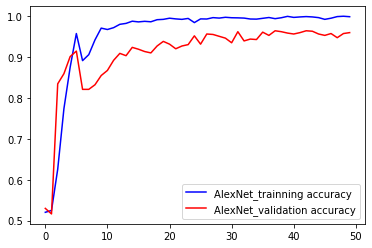

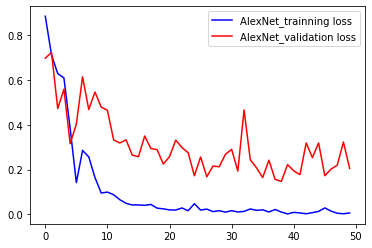

In [10]:
AlexNet_accuracy = AlexNet_history.history['accuracy']
AlexNet_val_accuracy = AlexNet_history.history['val_accuracy']
AlexNet_loss = AlexNet_history.history['loss']
AlexNet_val_loss = AlexNet_history.history['val_loss']
AlexNet_epochs = range(50)

plt.plot(AlexNet_epochs, AlexNet_accuracy, "b", label="AlexNet_trainning accuracy")
plt.plot(AlexNet_epochs, AlexNet_val_accuracy, "r", label="AlexNet_validation accuracy")
plt.legend()
plt.show()

plt.plot(AlexNet_epochs, AlexNet_loss, "b", label="AlexNet_trainning loss")
plt.plot(AlexNet_epochs, AlexNet_val_loss, "r", label="AlexNet_validation loss")
plt.legend()
plt.show()